# Data Visualisations with Commentary

Exploratory data analysis involves the examination of the key elements of our data set(s), typically using visualisation techniques and summary statistics. Before we conduct further analyses, the goal is to comprehend the data, find trends and anomalies, and test assumptions. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
from ipyleaflet import Map, basemaps, basemap_to_tiles, Circle, Polyline
import folium as fl
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMapWithTime
import geopandas as gpd

After gathering the Comma-Separated Values (.csv) datafile from data.gov.uk, we can use the `pandas.read_csv` function to call in the DataFrame.

In [2]:
df = pd.read_csv('abd_new_final_cleaned_df.csv')

/var/folders/vv/hjhf12hx45d8p72x04vqsw2w0000gn/T/ipykernel_54425/3836631376.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('abd_new_final_cleaned_df.csv')


Here, I am requesting the key information within our cleaned dataframe using the `.info()` function, showing important information including column names, non-null values, data-point counts, value types and memory useage (etc.).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562439 entries, 0 to 562438
Data columns (total 74 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    562439 non-null  int64  
 1   accident_index                562439 non-null  object 
 2   accident_year                 562439 non-null  int64  
 3   location_easting_osgr         562306 non-null  float64
 4   location_northing_osgr        562306 non-null  float64
 5   longitude                     562296 non-null  float64
 6   latitude                      562296 non-null  float64
 7   accident_severity             562439 non-null  int64  
 8   number_of_vehicles            562439 non-null  int64  
 9   number_of_casualties          562439 non-null  int64  
 10  date                          562439 non-null  object 
 11  day_of_week                   562439 non-null  int64  
 12  time                          562439 non-nul

As we can see, there are 73 columns within our DataFrame.

The next step is to create a new column called `date_time` which combines the `date` and `time` columns by using the Pandas function `pd.to_datetime()`. By doing this, we are able to easily computate temporal information when required.

In [4]:
df['date_time'] = df['date'] +' '+ df['time']
df['date_time'] = pd.to_datetime(df.date_time)
df.drop(['date', 'time'], axis = 1, inplace = True)

Here, we are checking the last 5 rows of the `date_time` column within the DataFrame to ensure the above column creation has been successful.

In [5]:
df.date_time.tail()

562434   2021-09-22 09:05:00
562435   2021-11-09 21:15:00
562436   2021-04-17 14:30:00
562437   2021-09-17 17:00:00
562438   2021-10-15 16:15:00
Name: date_time, dtype: datetime64[ns]

### Checking Data Distributions 

In [6]:
#Checking the normal distributions across all variables to be included within the research
def var_hist():
    df.hist(figsize=(25,15), bins=8, alpha = 0.75, color = 'lightseagreen')

### Temporal Analysis

#### Distribution of Accidents by Month of Year

In [7]:
#Plotting the distribution of accidents across each month in the UK
def accident_by_month():
    accident_month = df.groupby(df['date_time'].dt.month).count().date_time
    accident_month.index = [calendar.month_name[x] for x in range(1,13)]
    accident_month.plot(kind = 'bar', figsize = (15,10), color = 'darkorange', alpha = 0.75)
    plt.title('Accident Distribution in UK from 2016-2021', fontsize = 25)
    plt.ylabel('Accident Occurances', fontsize = 20)
    plt.xlabel('Month', fontsize = 20)
    plt.xticks(fontsize=12, rotation=25)
    plt.yticks(fontsize=12)

#### Distribution of Accidents Per Day of Week

In [8]:
def accident_by_day():  
    df['date_time'] = pd.to_datetime(df.date_time)

    plt.figure(figsize = (15, 10))
    df.date_time.dt.dayofweek.hist(bins = 7, rwidth = 0.75, alpha = 0.75, color = "royalblue")
    plt.title("Accidents Per Day Of Week", fontsize = 25)
    plt.ylabel('Accident Occurances', fontsize = 20)
    plt.xlabel('Monday     Tuesday     Wednesday     Thursday     Friday     Saturday     Sunday' , fontsize = 20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

#### Number of Accidents During Each Day of the Year, using Friday (max) and Sunday (min)

In [9]:
def friday_sunday_accidents():
    accidents = df.groupby(df['date_time'].dt.date).count().date_time
    accidents.plot(figsize = (30, 10), color = 'mediumseagreen')

    friday = df.groupby(df[df['date_time'].dt.dayofweek == 4].date_time.dt.date).count().date_time
    plt.scatter(friday.index, friday, color = 'red', label = 'Frdiay')

    sunday = df.groupby(df[df['date_time'].dt.dayofweek == 6].date_time.dt.date).count().date_time
    plt.scatter(sunday.index, sunday, color = 'blue', label = 'Sunday')

    plt.title("Accident variation between Friday's & Sunday's in the UK 2016-2021", fontsize = 40)
    plt.ylabel('Number of Accidents', fontsize = 30)
    plt.xlabel('Date', fontsize = 30)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(loc = 1, prop = {'size':20})


#### Distribution of Accidents Per Hour

In [10]:
def accidents_per_hr():
    accidents_hr = df.groupby(df['date_time'].dt.hour).count().date_time
    accidents_hr.plot(kind = 'bar', figsize = (15, 10), color = 'darkolivegreen', alpha = 0.75)

    plt.title("Accident Distribution Across Hour of Day", fontsize = 25)
    plt.ylabel('Number of Accidents', fontsize = 20)
    plt.xlabel('Hour of Day 00:00-23:00', fontsize = 20)
    plt.xticks(fontsize = 12, rotation = 0)
    plt.yticks(fontsize = 12)
    

#### Distribution of Accidents Per Day of the Week and Hour

In [11]:
def accidents_hour_per_day():
    accidents_hour_day = df.groupby([df['date_time'].dt.hour.rename('hour'),df['date_time'].dt.dayofweek.rename('day')]).count().date_time

    accidents_hour_day.unstack().plot(kind='barh', figsize = (20,30), width = 0.8)

    # title and x,y labels
    plt.legend(labels = [calendar.day_name[x] for x in range(0,7)], fontsize = 25)
    plt.title('Number of Accidents per Hour and Day',fontsize = 40)
    plt.xlabel('Number of accidents',fontsize = 30)
    plt.ylabel('Hour',fontsize = 30)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)


### Type of Accident Analysis

#### Age of People Involved 

In [12]:
a = len(df[df.age_0_5 == 1])
b = len(df[df.age_6_10 == 1])
c = len(df[df.age_11_15 == 1])
d = len(df[df.age_16_20 == 1])
e = len(df[df.age_21_25 == 1]) 
f = len(df[df.age_26_35 == 1])
g = len(df[df.age_36_45 == 1])
h = len(df[df.age_46_55 == 1])
i = len(df[df.age_56_65 == 1])
j = len(df[df.age_66_75 == 1])
k = len(df[df.age_75plus == 1])

age_bands_df = pd.DataFrame({'driver_age_band': ['0-5', '6-10', '11-15',\
                                       '16-20', '21-25', '26-35', '36-45',\
                                       '46-55', '56-65', '66-75', '75+'],\
                   'accident_cont': [a, b, c, d, e, f, g, h, i, j, k]})


In [13]:
def accident_age_range():
    x = age_bands_df.driver_age_band
    y = age_bands_df.accident_cont
    fig,ax = plt.subplots(figsize=(15, 10))
    plt.bar(x, y)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Age Range of People in Road Accidents', fontsize=25)
    plt.xlabel('Driver Age Groups', fontsize=18)
    plt.ylabel('Accident Occurences', fontsize=18)

    plt.show()

#### Accident within Speed Limit Zones

In [14]:
df2= df[df['speed_limit'] != -1] #discards accidents with no road speed limit data

In [15]:
def accident_in_speed_limit():
    acc_speed_limit = df2.speed_limit.value_counts()
    labels = ['30mph', '60mph', '40mph', '70mph', '50mph', '20mph']

    explode = (0, 0.1, 0.1, 0.1, 0.1, 0.1)
    fig = plt.figure(figsize = (10,10))
    plt.pie(acc_speed_limit.values, labels=labels, autopct = '%.1f', pctdistance = 0.8, labeldistance = 1.08, explode = explode, shadow = False, startangle = 160, textprops = {'fontsize': 20})
    plt.axis('equal')
    plt.figtext(0.5, 0.93, 'Accidents in a given speed limit (%)', fontsize = 25, ha = 'center')
    plt.show()

#### Number of Vehicles Involved

In [16]:
def vehicles_in_accident():
    vehicles_accident = df.number_of_vehicles.value_counts()
    vehicles_accident[25] = 0
    
    vehicles_accident.sort_index(inplace = True)

    vehicles_accident.plot(kind = 'bar', figsize = (15, 10), width = 0.8, color = 'goldenrod', alpha = 0.75)
    plt.title('Number of Vehicles in an Accident',fontsize = 25)
    plt.xlabel('Number of Vehicles Involved',fontsize = 20)
    plt.ylabel('Number of Accidents',fontsize = 20)
    plt.xticks(fontsize = 12, rotation = 0)
    plt.yticks(fontsize = 12)
    
    #for index in vehicles_accident.index:
        #plt.text(x=index,y=vehicles_accident.loc[index],s=str(vehicles_accident.loc[index]),horizontalalignment='center')
        

#### Slight - Serious - Fatal Injuries

In [17]:
def injury_by_type():
    # Series with number of mild injuries and serious injuries
    injury = df[['accident_severity']].value_counts()

    # Pie plot with the percentage of victims with slight, serious and fatal injuries
    explode = (0.03, 0.03, 0)
    injury.plot(kind = 'pie',figsize = (10,10), colors = ['forestgreen','orange','orangered'], explode = explode, labels = None, autopct = '%1.1f%%', pctdistance = 1.2, fontsize = 18)

    # Title and legend
    plt.legend(title = "Injury Level", labels = ['Slight', 'Serious', 'Fatal'],bbox_to_anchor = (0.85, 0.95), loc='upper left', borderaxespad=0, fontsize = 15)
    plt.title('Injury Type from UK Road Accidents', fontsize = 25)
    plt.ylabel('')


#### Rate of Injuries Per Day of the Week

In [18]:
def rate_of_injury_per_day():
    accident_severity = df['accident_severity']
    # Number of fatal injuries per day of the week
    accidents_fatal = df[df['accident_severity'] == 3].groupby(df['date_time'].dt.dayofweek).sum().accident_severity
    # Percentage of fatal injuries per day of the week
    rate_fatal = accidents_fatal/accident_severity.sum()

    # Number of serious injuries per day of the week
    accidents_serious = df[df['accident_severity'] == 2].groupby(df['date_time'].dt.dayofweek).sum().accident_severity
    # Percentage of seriois injuries per day of the week
    rate_serious = accidents_serious/accident_severity.sum()

    # Number of slight injuries per day of the week
    accidents_slight = df[df['accident_severity'] == 1].groupby(df['date_time'].dt.dayofweek).sum().accident_severity
    # Percentage of slight injuries per day of the week
    rate_slight = accidents_slight/accident_severity.sum()

    # Combine both series as a dataframe in order to plot them as a side by side bar
    rates = pd.DataFrame({'Fatal Injures':rate_fatal,'Serious Injuries':rate_serious,'Slight Injuries':rate_slight})
    rates.plot(kind = 'bar', figsize = (15, 10), width = 0.75, color = ['orangered', 'orange', 'forestgreen'], alpha = 0.75)
    
    # Title and labels
    plt.title('Rate of Injury Type by Day of Week',fontsize =25)
    plt.legend(fontsize = 12)
    plt.xlabel('Day of the week',fontsize = 20)
    plt.ylabel('Percentage of Total Collisions (%)',fontsize = 20)
    plt.xticks(np.arange(7),[calendar.day_name[x] for x in range(0,7)], fontsize = 12, rotation = 0)
    plt.yticks(fontsize = 12)

#### Rate of Injuries per Hour of Day

In [19]:
def rate_of_injury_per_hour():
    accident_severity = df['accident_severity']
    # Number of fatal injuries per day of the week
    accidents_fatal = df[df['accident_severity'] == 3].groupby(df['date_time'].dt.hour).sum().accident_severity
    # Percentage of fatal injuries per day of the week
    rate_fatal = accidents_fatal/accident_severity.sum()

    # Number of serious injuries per day of the week
    accidents_serious = df[df['accident_severity'] == 2].groupby(df['date_time'].dt.hour).sum().accident_severity
    # Percentage of seriois injuries per day of the week
    rate_serious = accidents_serious/accident_severity.sum()

    # Number of slight injuries per day of the week
    accidents_slight = df[df['accident_severity'] == 1].groupby(df['date_time'].dt.hour).sum().accident_severity
    # Percentage of slight injuries per day of the week
    rate_slight = accidents_slight/accident_severity.sum()

    # Combine both series as a dataframe in order to plot them as a side by side bar
    rates = pd.DataFrame({'Fatal Injures':rate_fatal,'Serious Injuries':rate_serious,'Slight Injuries':rate_slight})
    rates.plot(kind = 'bar', figsize = (20,12), width = 0.5, color = ['orangered', 'orange', 'forestgreen'], alpha = 0.75)

    # Title and labels
    plt.title('Rate of Injury Type by Hour of Day',fontsize = 30)
    plt.xlabel('Hour 00:00-23:00',fontsize = 20)
    plt.ylabel('Percentage of Total Collisions (%)',fontsize = 20)
    plt.xticks(fontsize = 18, rotation = 0)
    plt.yticks(fontsize = 18)
    plt.legend(fontsize = 20)


### Location Analysis

#### Interactive map

In [20]:
df3 = df[['latitude', 'longitude', 'accident_severity', 'date_time']].copy()
df3 = df3.dropna(subset=['latitude','longitude'])

In [21]:
def accidents_interactive_map():
    map1 = fl.Map(location=[df3.latitude.mean(),\
                           df3.longitude.mean()],\
                 zoom_start=4.5, control_scale=True)
    map1.add_child(FastMarkerCluster(df3[['latitude', 'longitude']].values.tolist()))
    return map1

#### Accident Heat Map with Time

In [22]:
def heat_interactive_map():
    map2 = fl.Map(location=[df3.latitude.mean(),\
                               df3.longitude.mean()],\
                     zoom_start=4.5, control_scale=True)
    hr_list = [[] for x in range(24)]
    for latitude,longitude,hour in zip(df3.latitude, df3.longitude, df3.date_time.dt.hour.values.tolist()):
        hr_list[hour].append([latitude, longitude])
    
    index = [str(i) + ' Hours' for i in range (24)]
    
    HeatMapWithTime(hr_list, index).add_to(map2)
    
    return map2

DataFrame sorted by accident severity fatal and weather conditions snowing.

In [23]:
fatal_snowing = df[(df['accident_severity'] == 3) & (df['weather_conditions'] == 6)]

In [24]:
fatal_rain_hwinds = df[(df['accident_severity'] == 3) & (df['weather_conditions'] == 5)]

##   Results visualisation (10)
(Example)

__Temporal Analysis - Commentary__

This is a simple visualisation which has been run to observe the distributions of our variables within the DataFrame. This stage is useful for determining any remaining outliers within variables.

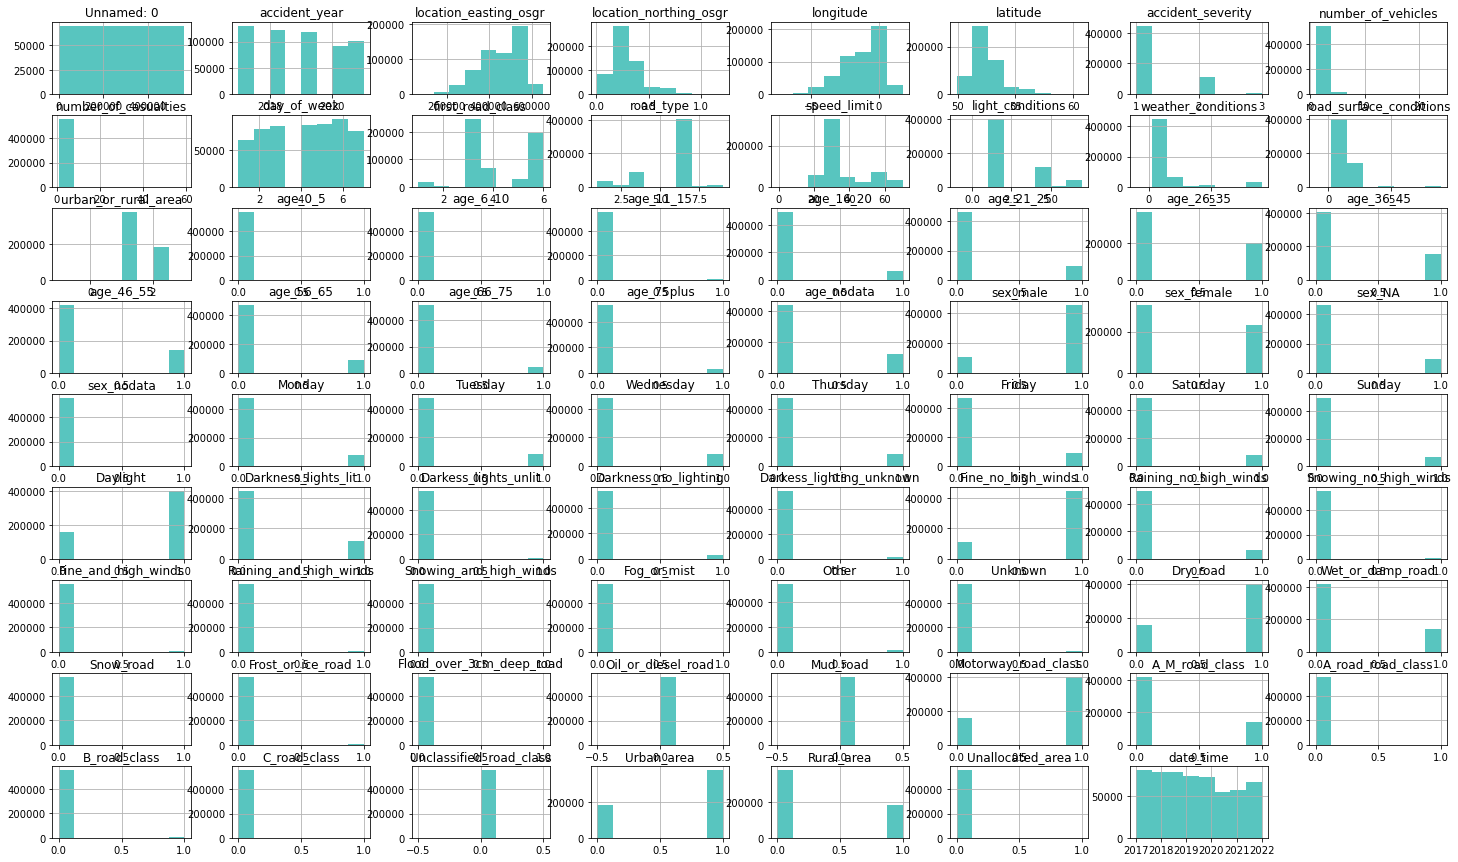

In [25]:
var_hist()

Here, we are using Pandas to study the distribution of vehicle accidents on a monthly basis across 2016 to 2021 though employing the `pd.DataFrame.groupby()` operation. Using this involves a combination of splitting an object, applying a function, and combining the results. 

We first group by month, and then we are able to figure out the number of accidents in any given month. Using a bar plot allows for a quick and simple visualisation.

As we can see, the number of accidents decreases in August and December, while September, October and November experience some of the highest rates of accidents. 

One explination for this oberved increase could be due to increased road using in these months, whereas people use their vehicles less in the Spring months.

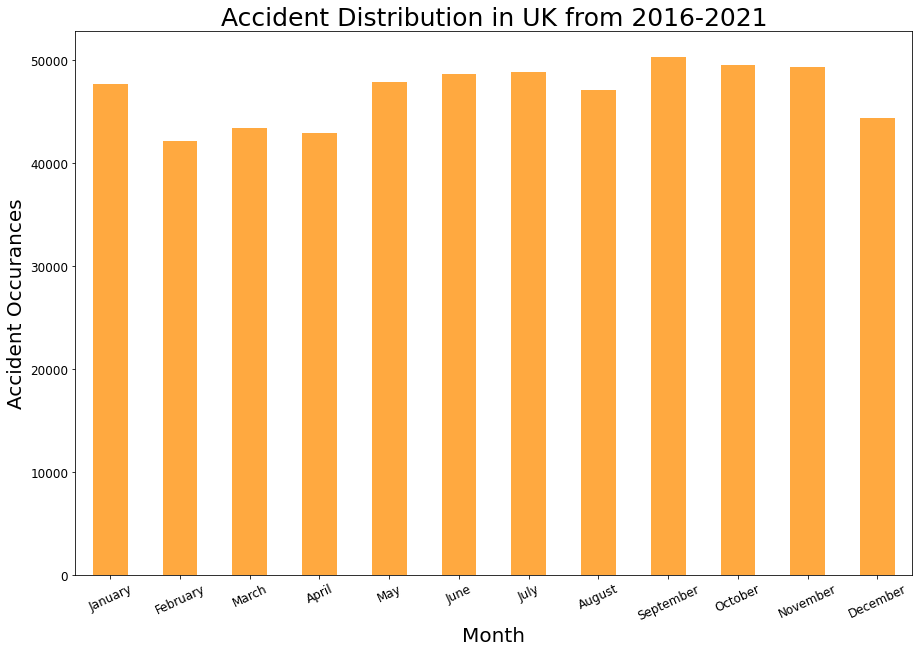

In [26]:
accident_by_month()

In order to explore the temporal distribution of accident occurance, we are using Pandas to study the distribution of vehicle accidents according to the day of thr week from 2017 to 2021 by employing the `pd.DataFrame.groupby()` operation. This tool involves a combination of splitting an object, applying a function, and combining the results. 

We first group by day, and then we are able to calculate the number of accidents for a given day. A bar plot allows for an effective and efficient visualisation.

As shown in the below plot, the number of vehicle accidents in the UK decrease at the weekend. As weekdays progress, the number of observed collisions increase, with Friday experiencing the highest number of total accidents (~90,000). Conversly, accident rates at weekends are significantly reduced.

An explination for this trend is likely due to vehicle useage trends, where people use their vehicles less frequently on the weekends as workers are not required to commute to work. Conversely, Friday's may experience such high rates of accidents due to tiredness, rushing to get home, and a lack of attention to surroundings after a busy work week. 

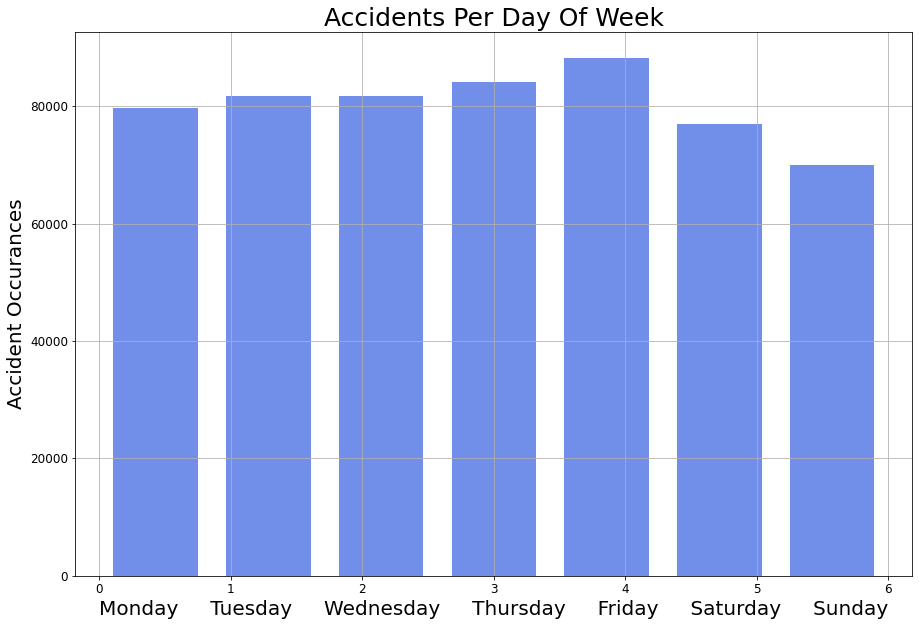

In [27]:
accident_by_day()

Next, we will plot the number of accidents during each day of each year from 2017 to 2021. As previously observed, Friday's typically experience the highest frequency of incidents, while Sunday's experience the fewest. As a rule, we can observe total accidents on Friday's with the red markers, while Sunday's are represented by blue markers. 

Using these two days to aid with this visualisation, we can see that there are between 200 and 500 accidents per day from 2017 to early 2020, whereas this range decreases to between 100 and 400 accidents per day from early 2020. 

This visualisation is particularly interesting as we can see clear fluctuations between 2020 and 2022, which is most likely due to the encorcement of COVID-19 lockdowns within the UK,: 
- 1st lockdown = March 2020-June 2020
- 2nd lockdown = November 2020
- 3rd lockdown = January 2021-March 2021 

As a consequence of these lockdowns, road networks experienced significantly reduced useage as people opted to shop online, work from home and isolate from the virus.  

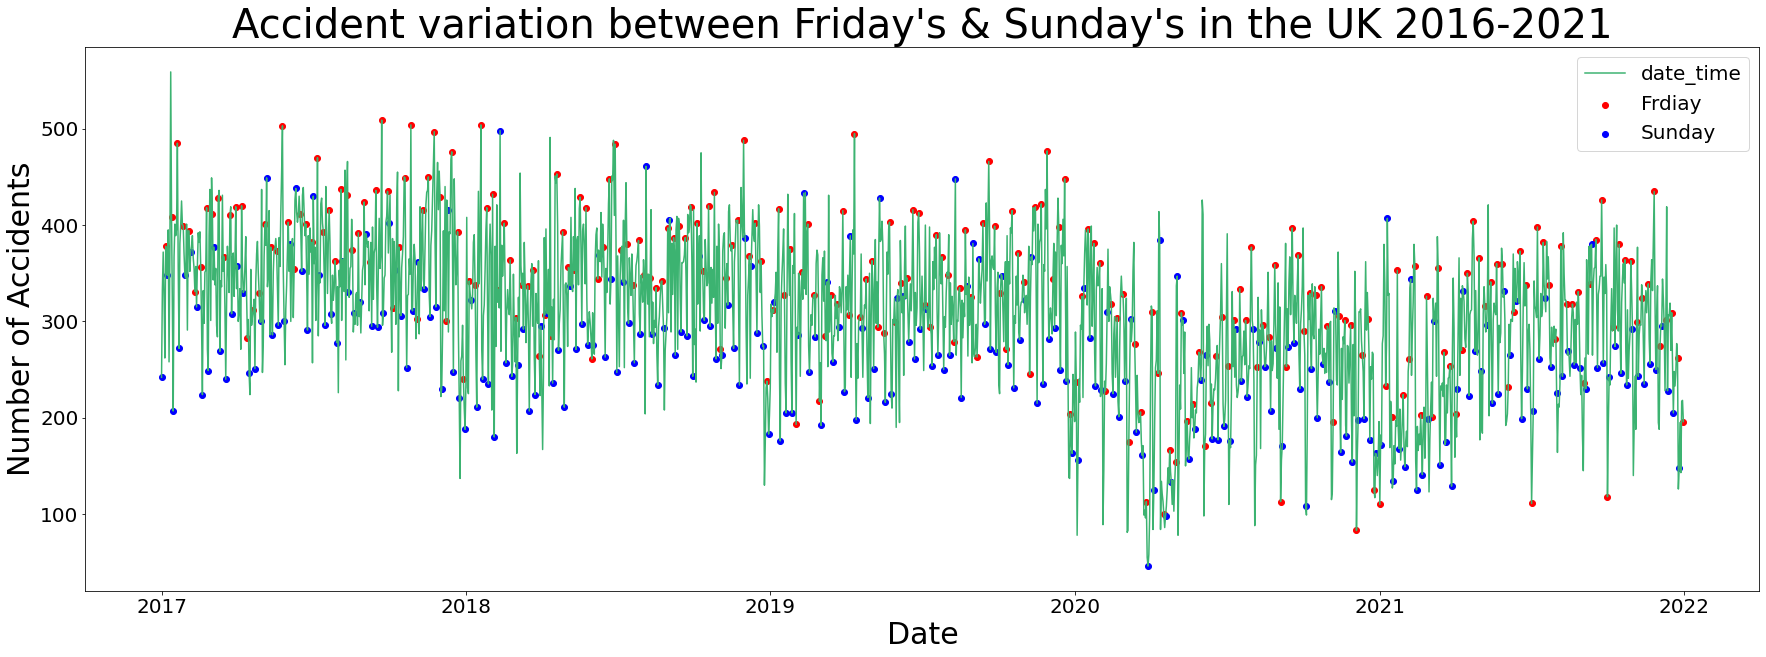

In [28]:
friday_sunday_accidents()

The following bar chart plots the distribution of car accidents according to their 24 hour occurance. Through understanding at what time accidents typically occur, we are able to guage the maximum and minimum times of accident occurances. 

As we can observe, there are two apparent peaks of traffic accidents which are from 07:00 and 09:00 and between 15:00 to 17:00. 

An explination for this is most likely due to the significant increase in road useage for the work commute and school runs.  

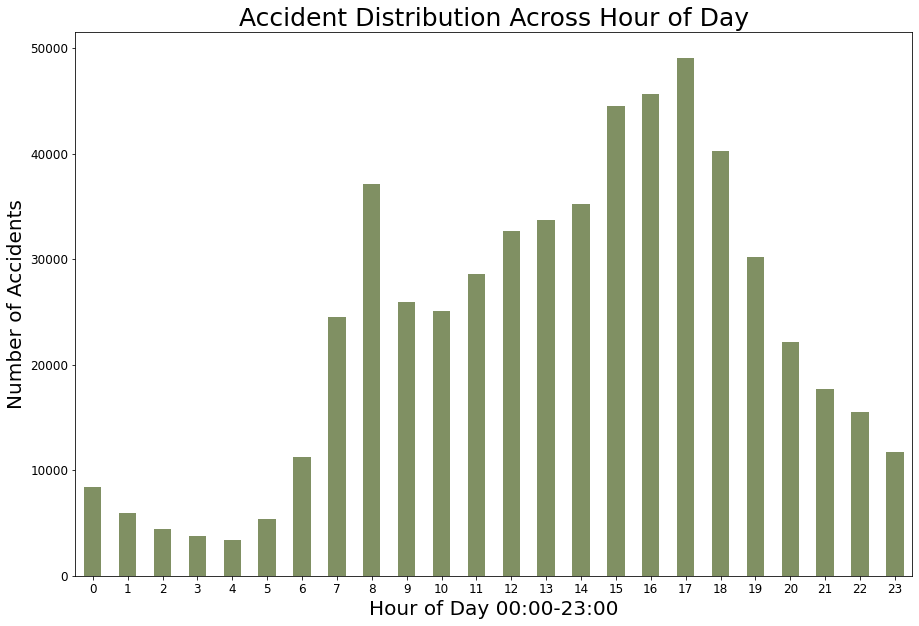

In [29]:
accidents_per_hr()

Next, we are analysing the number of accidents per day of the weeo and hour using a side-by-side bar plot. In this particular case, we have decided to use a horizontal plot for better visualisation. 

As we can observe, there are mosre accidents at night on the weekends than during weekdays. On the other hand, the frequency of observed accidents are much higher from early-morning (08:00) until the afternoon (18:00) during weekdays than at the weekend. 

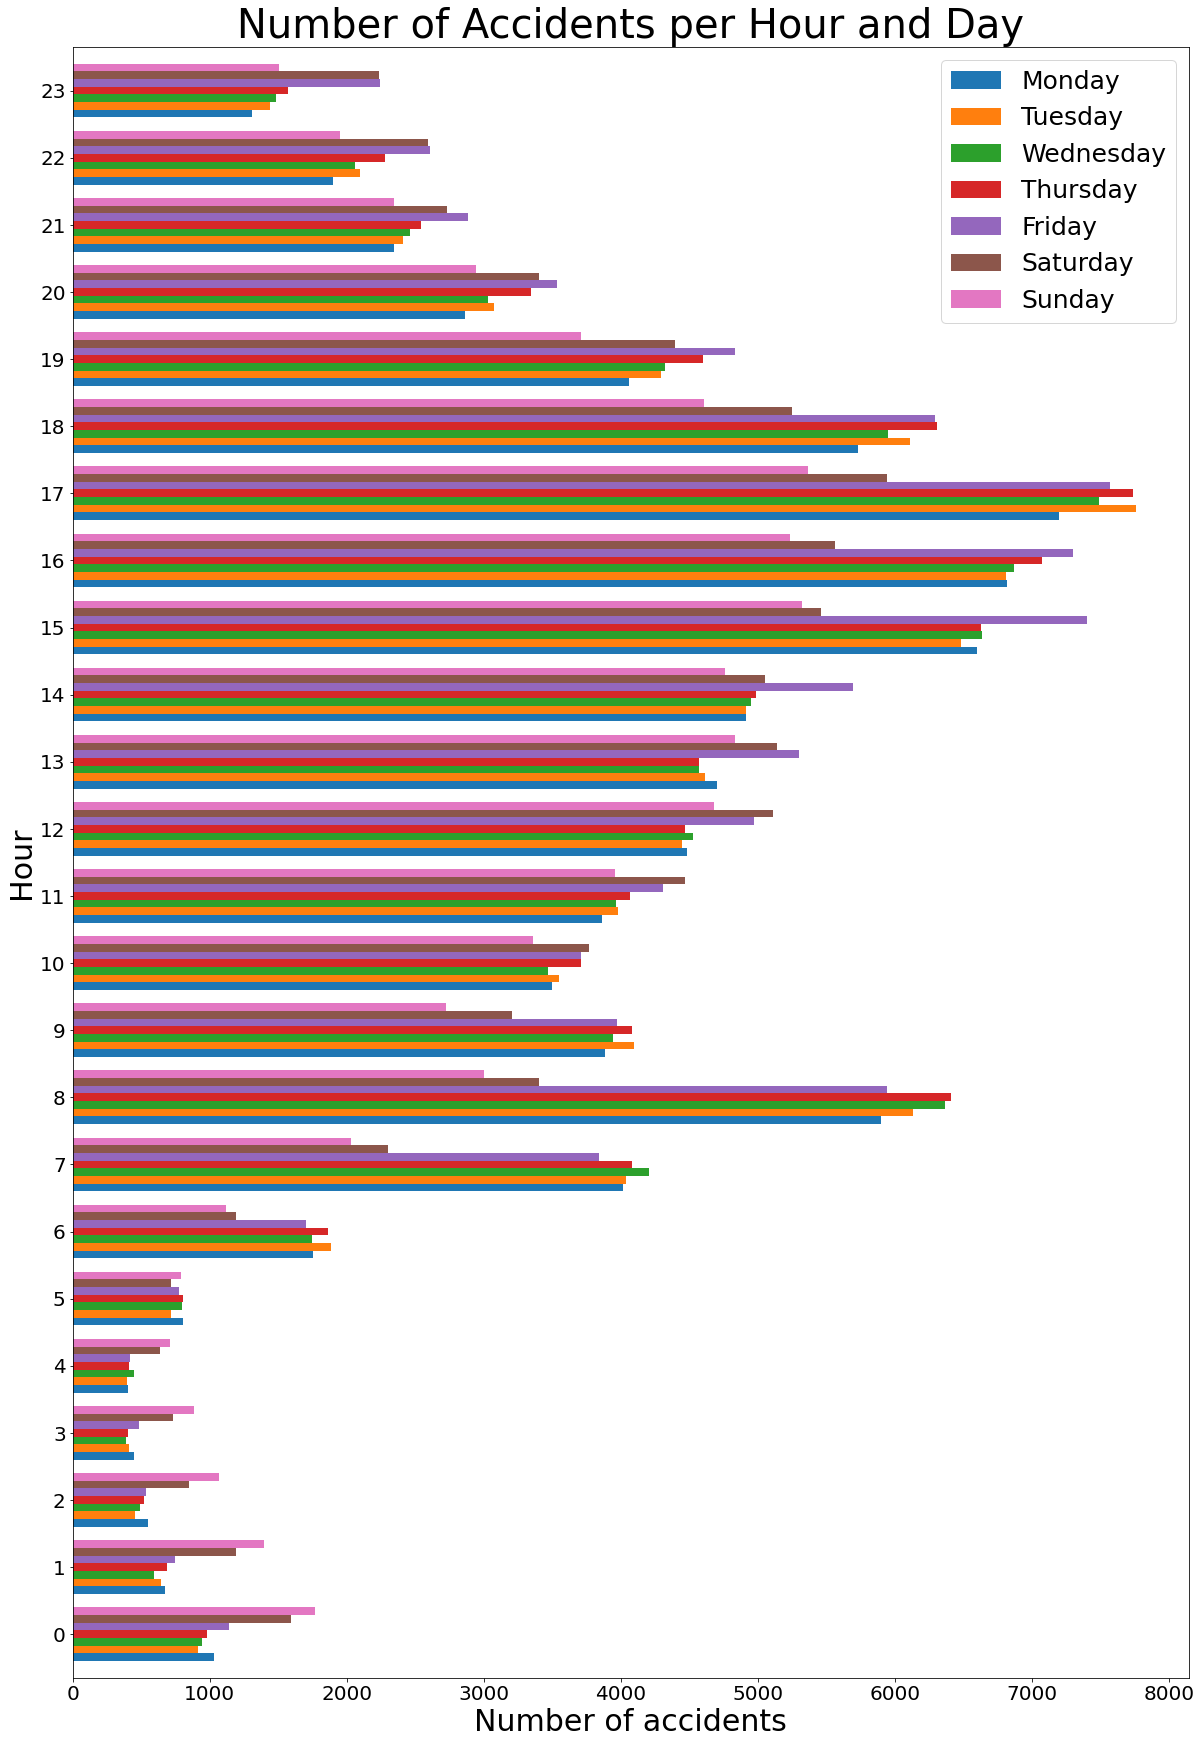

In [30]:
accidents_hour_per_day()

__Temporal Analysis - Summary__

- February experiences the lowest number of accidents across a 5 year time frame with ~42,000 accidents from 2016-2021. 
- September experiences the highest number of accidents across a 5 year time frame with ~48,000 accidents from 2016-2021. 
- The number of accidents decreases significantly at weekends. 
- Car accidents are more likely to occur between 07:00-09:00 and 15:00-18:00.
- At night, most accidents occur on the weekends (Friday, Saturday).

__Type of Accident Analysis - Commentary__

In our datasets, age-band was grouped into 11 different code.
__Abdulrahman__ Could you comment on this plot? Maybe with how you coded the age ranges into binary...

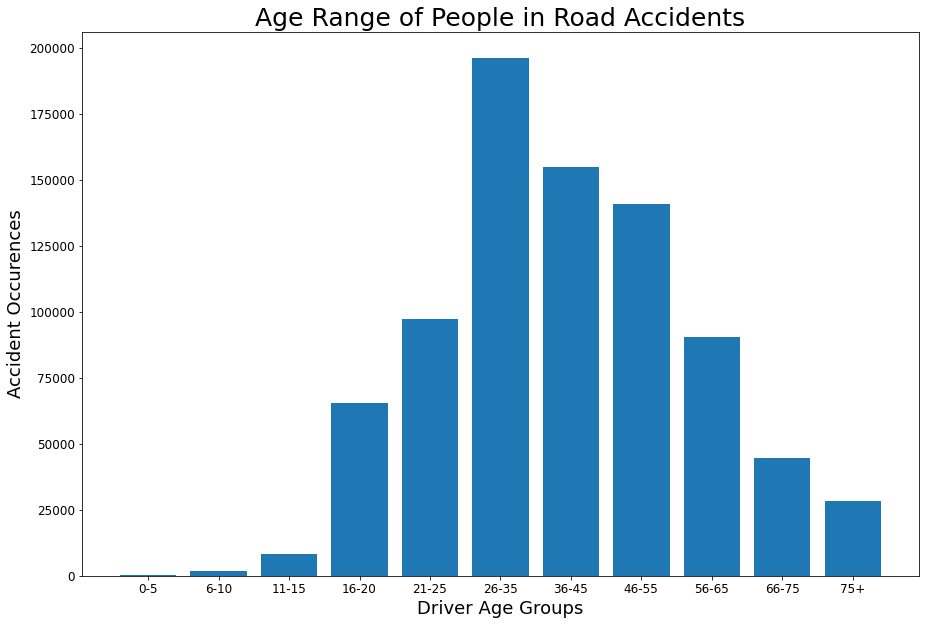

In [31]:
accident_age_range()

The following visualisation highlights some interesting information. As you can see, more than half of all collisions were on roads where the speed limit was 30 miles per hour (58.8%). We were expecting more collision to be on Motorways (70mph) or A-Roads (60mph).

However, this pattern does seem to make sense as zones with lower speed limits typically experience increased congestion, stop signs, changing lanes, traffic lights etc. 

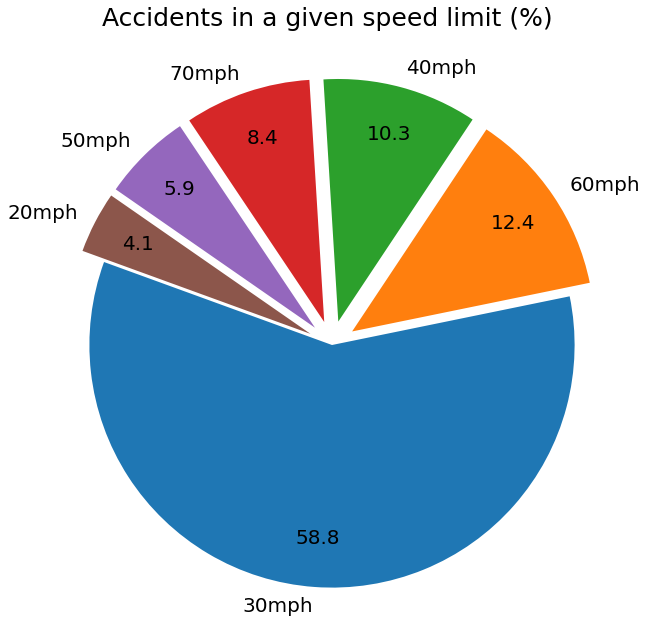

In [32]:
accident_in_speed_limit()

The following bar graph visualised the number of vehicles involved in any given incident between 2016 and 2021 in the UK. In the majority of accidents (~345,000), two vehicles were involved. Furthermore, the police recored one vehicle accident where up to 24(!) vehicles were involced! However, these types of collisions are not common.

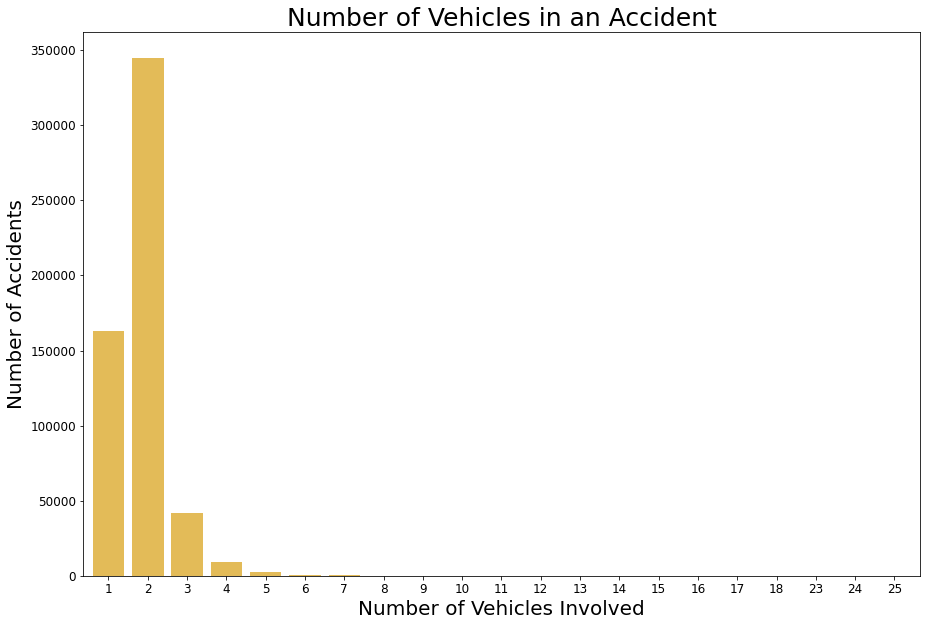

In [33]:
vehicles_in_accident()

The DataFrame includes information about how many victims suffered slight, serious or even fatal injuries. Here, we have created a pie chart to represent the proportions of each injury type. 

As we can see, the plot shows that only 1.4% of injuries recored were fatal. However, the plot does highlight that 19.2% of injuries recored were serious. 

Although the majority (79.4%) of injuries were slight, it would be interesting to analyse under what circumstances (date, time, location) serious injuries are more frequent. 

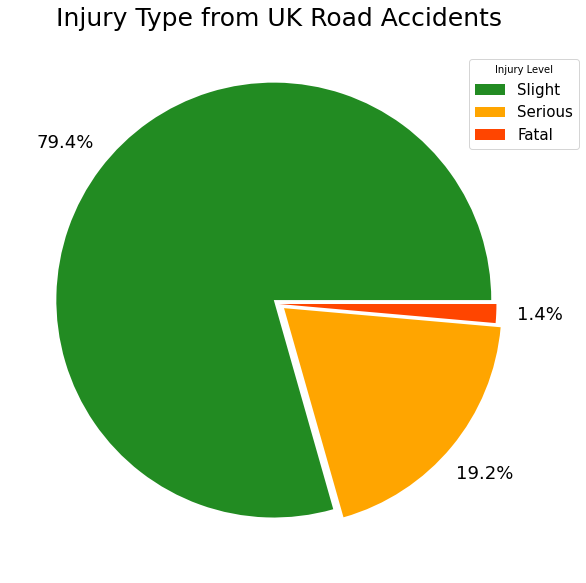

In [34]:
injury_by_type()

Using a clustered bar graph, the following plot highlights the percentage of injuries according to the day of the week. Slight and serious injuries follow the expected pattern of temporal distribution as observed before, since they observe higher rates during weekdays, when more accidents occur. 

However, fatal injuries present high rates on weekens, although the average number of accidents on weekends is lower than during weekdays. This indicates that accidents on weekends tend to be more severe than during weekdays. 

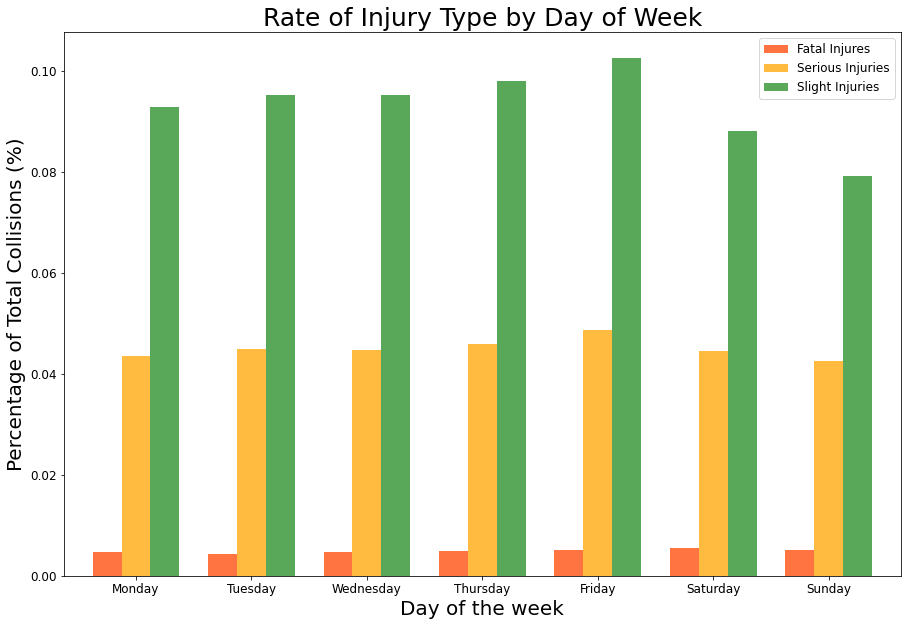

In [35]:
rate_of_injury_per_day()

In a similar fashion, we have plotted the percentage of injuries according the hour which highlights that accidents tend to be more severe in late-evenings and night. 

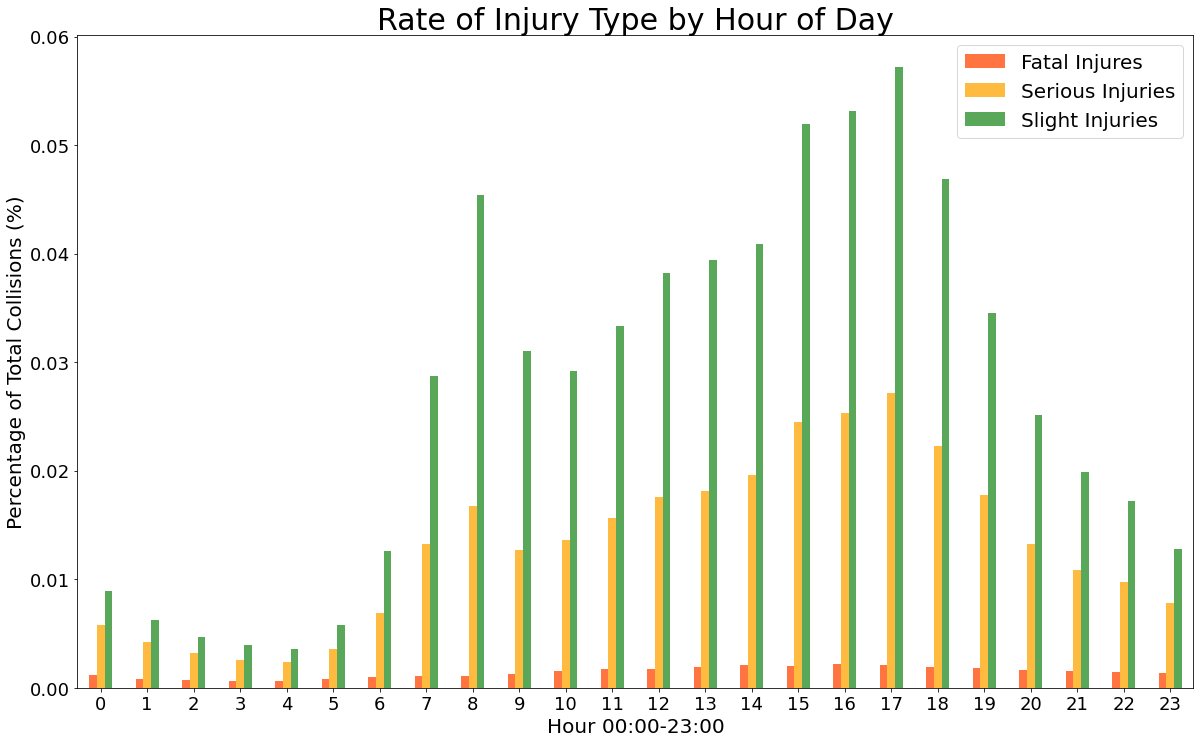

In [36]:
rate_of_injury_per_hour()

__Type of Accident Analysis - Conclusions__

- In most accidents, 1, 2, or 3 vehicles were incolved, with UK police reporting one accident of 24(!) vehicles.
- The majority of people injured in car accidents across 2016-2021 experienced slight injuries (79.4&).
- Accidents tend to be more severe during night, late-evening and weekends. 

__Location Analysis - Commentary__

One of the most effective ways of analysing spatial data is though using maps. In this project, we have decided to use the Folium tool, which is a Python library that aids in the creation of several types of Leaflet maps. 

Below, we have generated two maps of the UK by creating a Folium Map object. Helpfully, the location argument allows us to centre the map on a specific location (in this project, the average of all coordinates within the DataFrame). We have also specified an initial zoom level to present an appropriatly scaled map.

The below visualisation has been created to group interactive markers into clusters using the MarkerCluster Object. As you can see, the plot depicts vehicle accidents that experienced injuries, where accidents are grouped into clusters. 

It is clear that urban areas including London, Birmingham, Manchester experience significnalty higher rates of accidents than rural areas. 

One very useful feature of Folium is the possibility to create an animated heat map which changes based on a certian dimention (in this visualisation, hours) through using `HeatMapWithTime()` class method.

By creating a nested list where each position contains the coordinates (latitude and longitude) for all accidents in a given accident for a specific hour. 

For instance, hr_list[2] contains all the accidents that occured 00:02:00 to 00:02:59 (e.g. hour_list[2] → [[lat1,lon1],[lat2,lon2],[lat3,lon3],…,[latn,logn]).

From exploring the visualisation and timeline zoomed in on Leeds, we can observe how the number of accidents increases from 07:00-08:00 hours and again from 14:00-18:00. Before, inbetween and after these observed intervals, the heat map highlights a lower frequency of accident occurance within the Leeds region.